In [4]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cardiotocographic"

In [5]:
system("sudo apt-get install python3-venv")

In [6]:
# Install packages
library(keras)
# install_keras()

In [7]:
data <- read.csv("/kaggle/input/cardiotocographic/Cardiotocographic.csv", header = T)
str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [8]:
# View the first few rows of the data
head(data)

# Change to matrix
data <- as.matrix(data)
dimnames(data) <- NULL


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
2,132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
3,133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
4,134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
5,132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
6,134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


In [9]:
# Normalizing data 
data[, 1:21] <- normalize(data[, 1:21])
data[,22] <- as.numeric(data[,22]) -1
summary(data)

       V1               V2                  V3                  V4           
 Min.   :0.2894   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.3747   1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:5.398e-06  
 Median :0.3862   Median :4.572e-06   Median :0.000e+00   Median :1.286e-05  
 Mean   :0.3833   Mean   :8.915e-06   Mean   :2.721e-05   Mean   :1.264e-05  
 3rd Qu.:0.3949   3rd Qu.:1.596e-05   3rd Qu.:7.171e-06   3rd Qu.:1.900e-05  
 Max.   :0.4537   Max.   :5.983e-05   Max.   :1.446e-03   Max.   :4.244e-05  
       V5                  V6                  V7                  V8         
 Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.03438  
 1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:0.09199  
 Median :0.000e+00   Median :0.000e+00   Median :0.000e+00   Median :0.13506  
 Mean   :5.560e-06   Mean   :1.208e-08   Mean   :4.733e-07   Mean   :0.13498  
 3rd Qu.:9.478e-06   3rd Qu.:0.000e+00   3rd Qu.:0.000e+00 

In [10]:
# Data partition into training and test set
set.seed(1234)
ind <- sample(2, nrow(data), replace = T, prob = c(0.75, 0.25))
training <- data[ind==1, 1:21]
test <- data[ind ==2, 1:21]
training_target <- data[ind==1, 22]
test_target <- data[ind==2, 22]

In [11]:
# One Hot Encoding to classify the labels as 1 if yes / 0 if no
train_Labels <- to_categorical(training_target)
test_Labels <- to_categorical(test_target)
print(test_Labels)

       [,1] [,2] [,3]
  [1,]    1    0    0
  [2,]    1    0    0
  [3,]    1    0    0
  [4,]    0    0    1
  [5,]    0    0    1
  [6,]    0    1    0
  [7,]    1    0    0
  [8,]    1    0    0
  [9,]    1    0    0
 [10,]    1    0    0
 [11,]    1    0    0
 [12,]    1    0    0
 [13,]    1    0    0
 [14,]    1    0    0
 [15,]    1    0    0
 [16,]    1    0    0
 [17,]    1    0    0
 [18,]    0    1    0
 [19,]    0    1    0
 [20,]    1    0    0
 [21,]    1    0    0
 [22,]    0    0    1
 [23,]    1    0    0
 [24,]    1    0    0
 [25,]    1    0    0
 [26,]    1    0    0
 [27,]    1    0    0
 [28,]    1    0    0
 [29,]    1    0    0
 [30,]    0    1    0
 [31,]    1    0    0
 [32,]    1    0    0
 [33,]    1    0    0
 [34,]    1    0    0
 [35,]    1    0    0
 [36,]    1    0    0
 [37,]    1    0    0
 [38,]    1    0    0
 [39,]    1    0    0
 [40,]    1    0    0
 [41,]    0    1    0
 [42,]    0    1    0
 [43,]    0    1    0
 [44,]    1    0    0
 [45,]    

In [12]:
# Create sequential model 
model <- keras_model_sequential()
# Pipe function to add mutliple layers
model %>%
         layer_dense(units=8, activation = 'relu', input_shape = c(21)) %>%
         layer_dense(units = 3, activation = 'softmax')
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 8)                       176         
 dense (Dense)                      (None, 3)                       27          
Total params: 203
Trainable params: 203
Non-trainable params: 0
________________________________________________________________________________


In [13]:
# Compiling the model using categorical_crossentropy loss fn, adam algorithm optimiser
model %>%
         compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = 'accuracy')

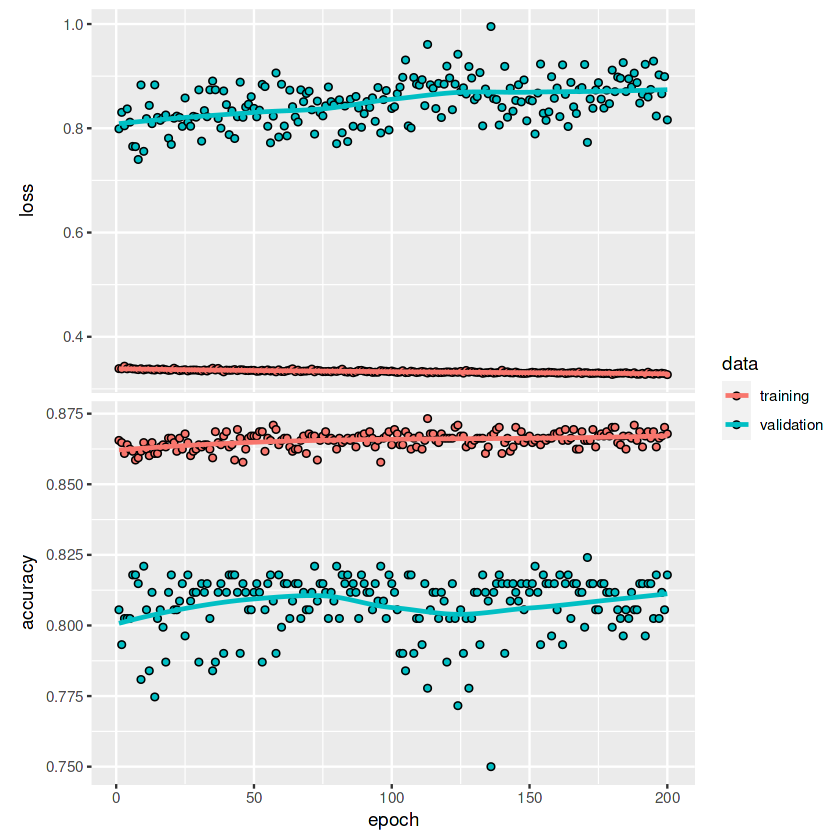

In [27]:
# Fit model to train set
history1 <- model %>%
         fit(training,
             train_Labels,
             epoch = 200,
             batch_size = 16,
             validation_split = 0.2)
plot(history1)

In [28]:
# Evaluate model with test data
model1 <- model %>%
         evaluate(test, test_Labels)

# Prediction and confusion matrix over test data
prob <-model %>% predict(test) %>% k_argmax()

pred <- model %>% predict(test) %>% k_argmax()

In [58]:
# Define the class data vectors
class1_data <- c(132, 0.006514658, 0, 0.008143322, 0, 0, 0, 16, 2.4, 0, 19.9, 117, 53, 170, 9, 0, 137, 136, 138, 11, 1)
class3_data <- c(134, 0.001049318, 0, 0.010493179, 0.009443861, 0, 0.002098636, 26, 5.9, 0, 0, 150, 50, 200, 5, 3, 76, 107, 107, 170, 0)
class2_data <- c(151, 0, 0, 0.000834028, 0.000834028, 0, 0, 64, 1.9, 9, 27.6, 130, 56, 186, 2, 0, 150, 148, 151, 9, 1)

# Normalise the data
class1_data <- normalize(class1_data[1:21])
class3_data <- normalize(class3_data[1:21])
class2_data <- normalize(class2_data[1:21])

list_of_class_data <- list(class1_data, class2_data, class3_data)

# Predict the class label for the new data points
for (i in seq_along(list_of_class_data)) {
  predicted_class <- model %>% predict(as.matrix(list_of_class_data[[i]])) %>% k_argmax()
  # Print the predicted class label
  print(predicted_class[1])
}

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [30]:
# Convert them to vectors
pred_vector <- as.vector(pred)
test_target_vector <- as.vector(test_target)

# Check the class of pred_vector and test_target_vector
print(class(pred_vector))
print(class(test_target_vector))

# Create confusion matrix
conf_matrix <- table(Predicted = pred_vector, Actual = test_target_vector)

# View confusion matrix
print(conf_matrix)

[1] "numeric"
[1] "numeric"
         Actual
Predicted   0   1   2
        0 373  41   7
        1  11  34   4
        2   3   4  31


# Fine Tuning Of Model using moreno of activation neurons

In [19]:
# Pipe function to add layers
model %>%
         layer_dense(units=50, activation = 'relu', input_shape = c(21)) %>%
         layer_dense(units = 25, activation = 'relu') %>%
         layer_dense(units = 3, activation = 'softmax')
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 8)                       176         
 dense (Dense)                      (None, 3)                       27          
 dense_4 (Dense)                    (None, 50)                      200         
 dense_3 (Dense)                    (None, 25)                      1275        
 dense_2 (Dense)                    (None, 3)                       78          
Total params: 1,756
Trainable params: 1,756
Non-trainable params: 0
________________________________________________________________________________


In [21]:
# Compile
model %>%
         compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = 'accuracy')

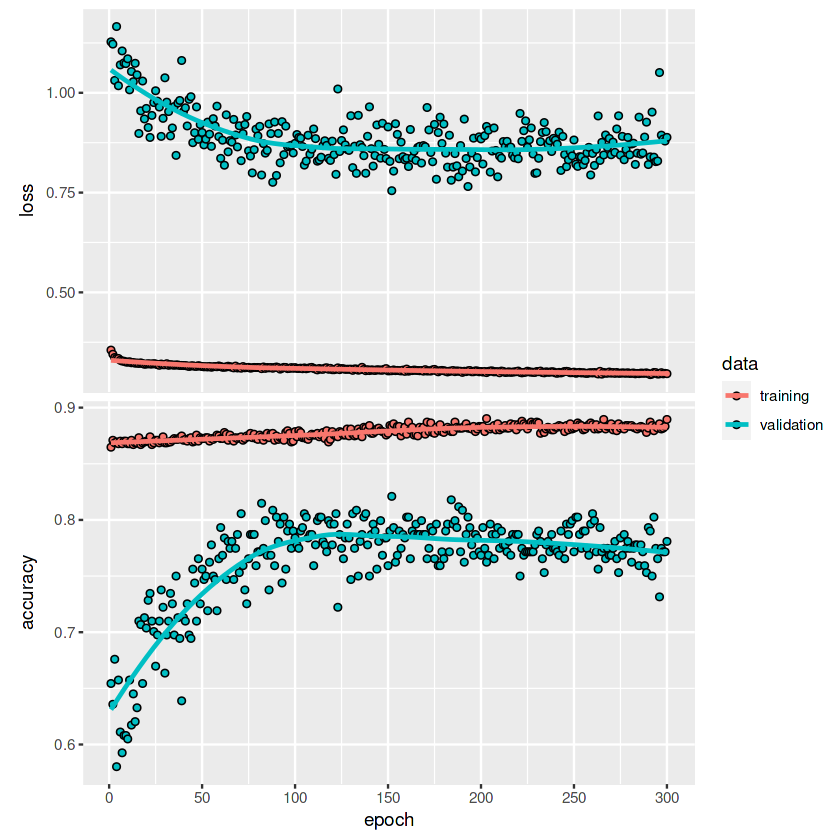

In [35]:
# Fit model
# Increase epochs
history2 <- model %>%
         fit(training,
             train_Labels,
             epoch = 300,
             batch_size = 16,
             validation_split = 0.2)
plot(history2)

In [38]:
# Evaluate model with test data
model2 <- model %>%
         evaluate(test, test_Labels)

In [40]:
# Prediction & confusion matrix - test data
prob <- model %>% predict(test) %>% k_argmax()

pred <- model %>% predict(test) %>% k_argmax()

In [59]:
# Define the class data vectors
class1_data <- c(132, 0.006514658, 0, 0.008143322, 0, 0, 0, 16, 2.4, 0, 19.9, 117, 53, 170, 9, 0, 137, 136, 138, 11, 1)
class3_data <- c(134, 0.001049318, 0, 0.010493179, 0.009443861, 0, 0.002098636, 26, 5.9, 0, 0, 150, 50, 200, 5, 3, 76, 107, 107, 170, 0)
class2_data <- c(151, 0, 0, 0.000834028, 0.000834028, 0, 0, 64, 1.9, 9, 27.6, 130, 56, 186, 2, 0, 150, 148, 151, 9, 1)

# Normalise the data
class1_data <- normalize(class1_data[1:21])
class3_data <- normalize(class3_data[1:21])
class2_data <- normalize(class2_data[1:21])

list_of_class_data <- list(class1_data, class2_data, class3_data)

# Predict the class label for the new data points
for (i in seq_along(list_of_class_data)) {
  predicted_class <- model %>% predict(as.matrix(list_of_class_data[[i]])) %>% k_argmax()
  # Print the predicted class label
  print(predicted_class[1])
}

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [41]:
# Convert them to vectors
pred_vector <- as.vector(pred)
test_target_vector <- as.vector(test_target)

# Check the class of pred_vector and test_target_vector
print(class(pred_vector))
print(class(test_target_vector))

# Create confusion matrix
conf_matrix <- table(Predicted = pred_vector, Actual = test_target_vector)

# View confusion matrix
print(conf_matrix)

[1] "numeric"
[1] "numeric"
         Actual
Predicted   0   1   2
        0 358  23   7
        1  22  50   3
        2   7   6  32
